In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import accuracy_score

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mnist = keras.datasets.fashion_mnist

In [0]:
# Load data, load_data() returns 2 tupels containing image and label
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Labeling the images
class_name = ['top','trouser','pullover', 'dress','coat','sandel','shirt','sneaker', 'bag','ankel boot']


In [0]:
np.max(x_train)

255

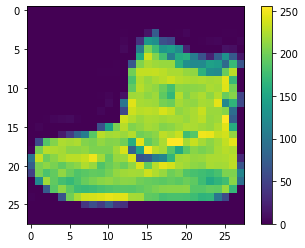

In [0]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [0]:
# Changing intensity of pixel from range 0-255 to 0-1
x_train = x_train/ 255.0
x_test = x_test/ 255.0

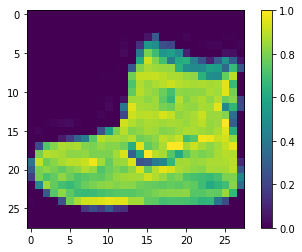

In [0]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [0]:
np.max(x_train)

1.0

### Build Model

In [0]:

input_layer = 128
output_layer = 10
epoch = 10


model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(input_layer, activation= 'relu'))
model.add(Dense(output_layer, activation= 'softmax'))




In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'adam', metrics= 'accuracy')

In [0]:
model.fit(x_train, y_train, epochs= epoch)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4994 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2789 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [0]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8773
0.8773000240325928


In [0]:
y_prediction = model.predict_classes(x_test)
accuracy_score(y_test, y_prediction)

0.8773